# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import scipy.sparse as sps
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

# Carregando os dados

In [2]:
start = time.time()
vetor_train_target = sps.load_npz('data/sparse_matrix_train_target_small.npz').tocsr()
matriz_train       = sps.load_npz('data/sparse_matrix_train_small.npz').tocsr()
matriz_test        = sps.load_npz('data/sparse_matrix_test_small.npz' ).tocsr()
end = time.time()


print('Tempo de carregamento das Matrizes: '+str("%.2f" % (end - start))+'s\n')


Tempo de carregamento das Matrizes: 0.05s



# Avaliando regressor linear

Tempo de processamento do regressor linear: 0.15s


RMSE MEAN:  0.2610
RMSE STD:   0.0167 




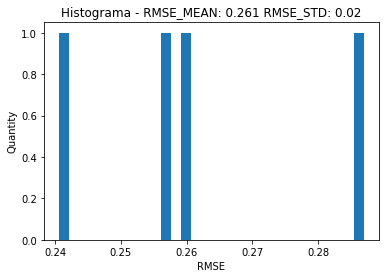

In [6]:
from sklearn.linear_model import LinearRegression
start = time.time()

rmse_list =[]
X = matriz_train
y = vetor_train_target
kf = KFold(n_splits=4);
    
# Dividindo dados de treino
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33)

for train, test in kf.split(X):
    X_train, X_test = X[train], X[test];
    y_train, y_test = y[train], y[test];
        
    # Criando Regressor Linear
    regr = LinearRegression(n_jobs = -1)
    
    # Treino
    regr.fit(X_train, y_train.toarray().ravel()) 
    
    # Predição     
    y_pred = regr.predict(X_test)
    
    #Root mean squared error
    rmse_list.append(np.sqrt(mean_squared_error(y_test.todense(), y_pred)));

end = time.time()

print('Tempo de processamento do regressor linear: '+str("%.2f" % (end - start))+'s\n\n')
print("RMSE MEAN: ","%.4f" % np.mean(rmse_list))
print("RMSE STD:  ","%.4f" % np.std(rmse_list), '\n\n')

plt.title(u"Histograma - RMSE_MEAN: " + str("%.3f" % np.mean(rmse_list))+ " RMSE_STD: " + str("%.2f" % np.std(rmse_list)))
plt.ylabel("Quantity")
plt.xlabel("RMSE")

plt.hist(rmse_list,bins =30)
plt.show()

# Avaliando regressor Ridge

Tempo de processamento do regressor ridge: 0.19s


RMSE MEAN:  0.2465
RMSE STD:   0.0147 




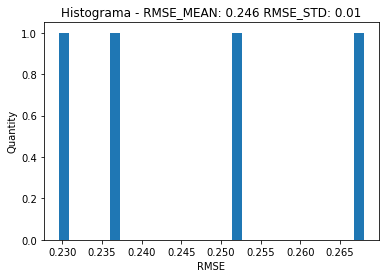

In [7]:
from sklearn.linear_model import Ridge
start = time.time()

rmse_list =[]
X = matriz_train
y = vetor_train_target
kf = KFold(n_splits=4);
    
# Dividindo dados de treino
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33)

for train, test in kf.split(X):
    X_train, X_test = X[train], X[test];
    y_train, y_test = y[train], y[test];

    # Criando Regressor Linear
    regr = Ridge(alpha = 29.0)

    # Treino
    regr.fit(X_train, y_train.toarray().ravel()) 

    # Predição     
    y_pred = regr.predict(X_test)
    
    #Root mean squared error
    rmse_list.append(np.sqrt(mean_squared_error(y_test.todense(), y_pred)));

end = time.time()

print('Tempo de processamento do regressor ridge: '+str("%.2f" % (end - start))+'s\n\n')
print("RMSE MEAN: ","%.4f" % np.mean(rmse_list))
print("RMSE STD:  ","%.4f" % np.std(rmse_list), '\n\n')

plt.title(u"Histograma - RMSE_MEAN: " + str("%.3f" % np.mean(rmse_list))+ " RMSE_STD: " + str("%.2f" % np.std(rmse_list)))
plt.ylabel("Quantity")
plt.xlabel("RMSE")

plt.hist(rmse_list,bins =30)
plt.show()

# Avaliando regressor GradientBoosting

Tempo de processamento do GradientBoostingRegressor : 10.06s


RMSE MEAN:  0.2582
RMSE STD:   0.0149 




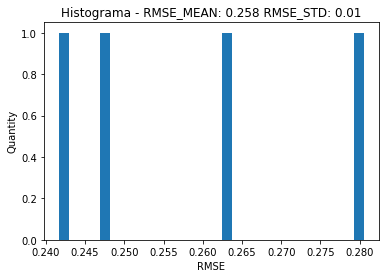

In [8]:
from sklearn.ensemble import GradientBoostingRegressor
start = time.time()

rmse_list =[]
X = matriz_train
y = vetor_train_target
kf = KFold(n_splits=4);
    
# Dividindo dados de treino
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33)

for train, test in kf.split(X):
    X_train, X_test = X[train], X[test];
    y_train, y_test = y[train], y[test];

    # Criando Regressor Linear
    regr = GradientBoostingRegressor(learning_rate = 0.01)

    # Treino
    regr.fit(X_train, y_train.toarray().ravel()) 

    # Predição     
    y_pred = regr.predict(X_test)
    
    #Root mean squared error
    rmse_list.append(np.sqrt(mean_squared_error(y_test.todense(), y_pred)));

end = time.time()

print('Tempo de processamento do GradientBoostingRegressor : '+str("%.2f" % (end - start))+'s\n\n')
print("RMSE MEAN: ","%.4f" % np.mean(rmse_list))
print("RMSE STD:  ","%.4f" % np.std(rmse_list), '\n\n')

plt.title(u"Histograma - RMSE_MEAN: " + str("%.3f" % np.mean(rmse_list))+ " RMSE_STD: " + str("%.2f" % np.std(rmse_list)))
plt.ylabel("Quantity")
plt.xlabel("RMSE")

plt.hist(rmse_list,bins =30)
plt.show()

# Avaliando regressor SVM

Tempo de processamento do regressor SVM: 0.90s


RMSE MEAN:  0.2582
RMSE STD:   0.0139 




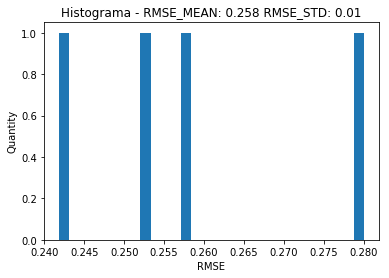

In [9]:
from sklearn.svm import SVR
start = time.time()

rmse_list =[]
X = matriz_train
y = vetor_train_target
kf = KFold(n_splits=4);
    
# Dividindo dados de treino
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33)

for train, test in kf.split(X):
    X_train, X_test = X[train], X[test];
    y_train, y_test = y[train], y[test];

    # Criando Regressor SVM
    regr = SVR('linear')
    
    # Treino
    regr.fit(X_train, y_train.toarray().ravel()) 

    # Predição     
    y_pred = regr.predict(X_test)
    
    #Root mean squared error
    rmse_list.append(np.sqrt(mean_squared_error(y_test.todense(), y_pred)));

end = time.time()

print('Tempo de processamento do regressor SVM: '+str("%.2f" % (end - start))+'s\n\n')
print("RMSE MEAN: ","%.4f" % np.mean(rmse_list))
print("RMSE STD:  ","%.4f" % np.std(rmse_list), '\n\n')

plt.title(u"Histograma - RMSE_MEAN: " + str("%.3f" % np.mean(rmse_list))+ " RMSE_STD: " + str("%.2f" % np.std(rmse_list)))
plt.ylabel("Quantity")
plt.xlabel("RMSE")

plt.hist(rmse_list,bins =30)
plt.show()

# Avaliando regresor KNN

Tempo de processamento do regressor KNN: 0.11s


RMSE MEAN:  0.2501
RMSE STD:   0.0140 




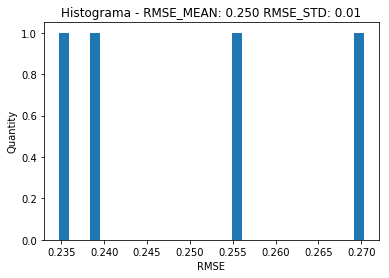

In [10]:
from sklearn.neighbors import KNeighborsRegressor
start = time.time()

rmse_list =[]
X = matriz_train
y = vetor_train_target
kf = KFold(n_splits=4);
    
# Dividindo dados de treino
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33)

for train, test in kf.split(X):
    X_train, X_test = X[train], X[test];
    y_train, y_test = y[train], y[test];

    # Criando Regressor KNN
    regr = KNeighborsRegressor(algorithm='auto', leaf_size=50, metric='minkowski',
                               metric_params=None, n_jobs=1, n_neighbors=30, p=2,
                               weights='distance')
    
    # Treino
    regr.fit(X_train, y_train.toarray().ravel()) 

    # Predição     
    y_pred = regr.predict(X_test)
    
    #Root mean squared error
    rmse_list.append(np.sqrt(mean_squared_error(y_test.todense(), y_pred)));

end = time.time()

print('Tempo de processamento do regressor KNN: '+str("%.2f" % (end - start))+'s\n\n')
print("RMSE MEAN: ","%.4f" % np.mean(rmse_list))
print("RMSE STD:  ","%.4f" % np.std(rmse_list), '\n\n')

plt.title(u"Histograma - RMSE_MEAN: " + str("%.3f" % np.mean(rmse_list))+ " RMSE_STD: " + str("%.2f" % np.std(rmse_list)))
plt.ylabel("Quantity")
plt.xlabel("RMSE")

plt.hist(rmse_list,bins =30)
plt.show()

# Avaliando regressor LGBM

Tempo de processamento do regressor LGBM: 0.35s


RMSE MEAN:  0.2539
RMSE STD:   0.0145 




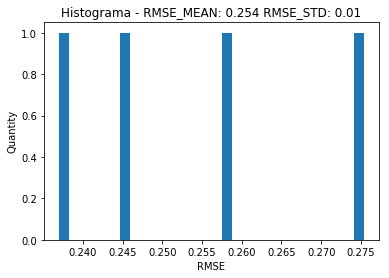

In [11]:
from lightgbm import LGBMRegressor
start = time.time()

rmse_list =[]
X = matriz_train
y = vetor_train_target
kf = KFold(n_splits=4);
    
# Dividindo dados de treino
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33)

for train, test in kf.split(X):
    X_train, X_test = X[train], X[test];
    y_train, y_test = y[train], y[test];

    # Criando Regressor LGBM
    regr = LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                         learning_rate=0.05, max_depth=-1, min_child_samples=20,
                         min_child_weight=0.001, min_split_gain=0.0, n_estimators=15,
                         n_jobs=-1, num_leaves=5, objective='regression', random_state=None,
                         reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
                         subsample_for_bin=200000, subsample_freq=1) 
    
    # Treino
    regr.fit(X_train, y_train.toarray().ravel(),  eval_metric='metric') 

    # Predição     
    y_pred = regr.predict(X_test)
    
   #Root mean squared error
    rmse_list.append(np.sqrt(mean_squared_error(y_test.todense(), y_pred)));

end = time.time()

print('Tempo de processamento do regressor LGBM: '+str("%.2f" % (end - start))+'s\n\n')
print("RMSE MEAN: ","%.4f" % np.mean(rmse_list))
print("RMSE STD:  ","%.4f" % np.std(rmse_list), '\n\n')

plt.title(u"Histograma - RMSE_MEAN: " + str("%.3f" % np.mean(rmse_list))+ " RMSE_STD: " + str("%.2f" % np.std(rmse_list)))
plt.ylabel("Quantity")
plt.xlabel("RMSE")

plt.hist(rmse_list,bins =30)
plt.show()

# Avaliando regressor XGBoost

Tempo de processamento do regressor linear: 1.06s


RMSE MEAN:  0.2562
RMSE STD:   0.0134 




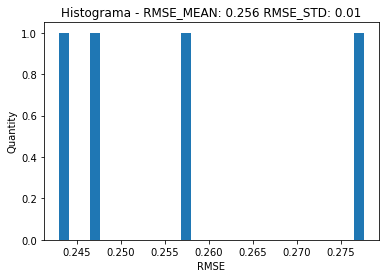

In [12]:
from xgboost import XGBRegressor
start = time.time()

rmse_list =[]
X = matriz_train
y = vetor_train_target
kf = KFold(n_splits=4);
    
# Dividindo dados de treino
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33)

for train, test in kf.split(X):
    X_train, X_test = X[train], X[test];
    y_train, y_test = y[train], y[test];
        
    # Criando Regressor Linear
    regr = XGBRegressor(n_estimators=30)
    
    # Treino
    regr.fit(X_train, y_train.toarray().ravel()) 
    
    # Predição     
    y_pred = regr.predict(X_test)
    
    #Root mean squared error
    rmse_list.append(np.sqrt(mean_squared_error(y_test.todense(), y_pred)));

end = time.time()

print('Tempo de processamento do regressor linear: '+str("%.2f" % (end - start))+'s\n\n')
print("RMSE MEAN: ","%.4f" % np.mean(rmse_list))
print("RMSE STD:  ","%.4f" % np.std(rmse_list), '\n\n')

plt.title(u"Histograma - RMSE_MEAN: " + str("%.3f" % np.mean(rmse_list))+ " RMSE_STD: " + str("%.2f" % np.std(rmse_list)))
plt.ylabel("Quantity")
plt.xlabel("RMSE")

plt.hist(rmse_list,bins =30)
plt.show()

# Utilizando regressor ridge em dados de teste

In [15]:

X_train = matriz_train
y_train = vetor_train_target
X_test  = matriz_test

# Criando Regressor Ridge
regr = Ridge(alpha = 29.0)

# Treino
regr.fit(X_train, y_train.toarray().ravel()) 

# Predição      
y_pred = regr.predict(X_test)

# Melhorando resultado
def fronteira(y):
    if y >1:
        return 1.0
    elif y <0:
        return 0.0
    else:
        return y
    
y_pred = np.array(list(map(fronteira, y_pred)))


# Utilizando Bagging

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.utils import check_random_state
from sklearn.ensemble import BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

#randomState = check_random_state(0)
X = matriz_train
y = vetor_train_target

def regressao_bagging(base_estimator, params):
    
    X = matriz_train
    y = vetor_train_target

    # Dividindo dados de treino
    #X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33)
    
    kf = KFold(n_splits=4);
    for train, test in kf.split(X):
        X_train, X_test = X[train], X[test];
        y_train, y_test = y[train], y[test];

    # Criando Regressor Linear
    #regr = BaggingRegressor(base_estimator=base_estimator,
    #                     **params, random_state=randomState)
    regr = BaggingRegressor(base_estimator=base_estimator,
                         **params)
    
    # Treino
    regr.fit(X_train, y_train.toarray().ravel()) 

    # Predição     
    y_pred = regr.predict(X_test)
    
    #Root mean squared error
    return np.sqrt(mean_squared_error(y_test.todense(), y_pred))

# Parametros a serem variados no bagging
grid = ParameterGrid({"max_samples": [0.5, 1.0],
                      "max_features": [0.5, 1.0],
                      "bootstrap": [True, False],
                      "bootstrap_features": [True, False]})

# Testando cada estimador com cada configuração de parametros

for base_estimator in [
    #None,
    #Ridge(alpha = 29.0),
    #GradientBoostingRegressor(learning_rate = 0.01),
    #DummyRegressor(),
    #DecisionTreeRegressor(),
    #SVR(),
    #KNeighborsRegressor(),
    #LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.05, n_estimators=15),
    XGBRegressor()]:
    for params in grid:
        start = time.time()
        rmse_list =[]

        # Testando 20 vezes através de amostras aleatórias
        for i in range(20):
            rmse = regressao_bagging(base_estimator,params)
            rmse_list.append(rmse)
        end = time.time()

        print('Tempo de processamento do regressor Bagging - Estimador: ' + str(base_estimator) + ' params: ' + str(params) + ': '+str("%.2f" % (end - start))+'s\n')
        print("RMSE MEAN: ","%.4f" % np.mean(rmse_list))
        print("RMSE STD:  ","%.4f" % np.std(rmse_list))
        print("\n")

Tempo de processamento do regressor Bagging - Estimador: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1) params: {'bootstrap': True, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 0.5}: 77.78s

RMSE MEAN:  0.2398
RMSE STD:   0.0026




# Salvando o resultado

In [5]:
df_test_item_id  = pd.read_csv('./data/test.csv' , encoding='utf8')['item_id'].head(y_pred.shape[0])
df_y_pred = pd.DataFrame(y_pred, columns = ['deal_probability'])
df_resultado = pd.concat([df_test_item_id,df_y_pred],axis =1)
df_resultado.to_csv('submission.csv', encoding='utf-8', index=False)